In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

In [99]:
Names = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]
Ds = pd.read_csv("winequality.csv", sep =";" ,names = Names )
Ds.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [100]:
Ds.shape

(5031, 12)

In [101]:
X = Ds.iloc[:,:-1]
y = Ds.iloc[:,-1]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [102]:
ss = StandardScaler()
ss.fit_transform(X)

array([[ 0.14459459, -0.14077409,  0.23312182, ..., -1.25625224,
        -0.36018268, -1.38378437],
       [-0.67022064,  0.12197287,  0.07222795, ...,  0.70595528,
        -0.04156137, -0.81262044],
       [ 1.42501853, -0.05319177,  0.55490956, ...,  0.44432761,
        -0.43983801, -0.32305137],
       ...,
       [ 1.30861635,  4.01938608,  1.84206052, ...,  0.31351378,
         1.31257923, -0.89421529],
       [-1.48503587,  1.87361926, -1.93894543, ...,  2.86438355,
         1.07361324,  2.04319918],
       [-1.48503587,  1.87361926, -1.93894543, ...,  2.86438355,
         1.07361324,  2.04319918]])

In [103]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [104]:
samples

[(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
  4145            6.8             0.260         0.29           11.90      0.052   
  2401            9.2             0.160         0.49            2.00      0.044   
  2917            7.1             0.360         0.40            1.95      0.033   
  3016            7.0             0.130         0.37           12.85      0.042   
  4429            6.1             0.310         0.34            2.80      0.042   
  ...             ...               ...          ...             ...        ...   
  4931            6.9             0.605         0.12           10.70      0.073   
  3264            5.9             0.240         0.12            1.40      0.035   
  1653            7.9             0.330         0.28           31.60      0.053   
  2607            8.9             0.260         0.33            8.10      0.024   
  2732            7.9             0.510         0.34            2.60      0.049   
  
 

In [105]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])

In [106]:
def fitnessFunction(kernel, C, gamma):
  svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

In [107]:
for i in range(len(samples)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]

Best Accuracy =  0.58 Best Kernel =  rbf Best Nu =  8.74 Best Epsilon =  7.82
Best Accuracy =  0.57 Best Kernel =  rbf Best Nu =  3.28 Best Epsilon =  6.12
Best Accuracy =  0.59 Best Kernel =  rbf Best Nu =  7.49 Best Epsilon =  8.81
Best Accuracy =  0.6 Best Kernel =  rbf Best Nu =  2.99 Best Epsilon =  9.77
Best Accuracy =  0.59 Best Kernel =  rbf Best Nu =  5.9 Best Epsilon =  6.05
Best Accuracy =  0.6 Best Kernel =  rbf Best Nu =  9.52 Best Epsilon =  5.85
Best Accuracy =  0.6 Best Kernel =  rbf Best Nu =  4.71 Best Epsilon =  7.59
Best Accuracy =  0.57 Best Kernel =  rbf Best Nu =  7.86 Best Epsilon =  4.84
Best Accuracy =  0.61 Best Kernel =  rbf Best Nu =  0.98 Best Epsilon =  7.88
Best Accuracy =  0.57 Best Kernel =  rbf Best Nu =  5.78 Best Epsilon =  4.64


In [108]:
result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.58,rbf,8.74,7.82
1,2,0.57,rbf,3.28,6.12
2,3,0.59,rbf,7.49,8.81
3,4,0.60,rbf,2.99,9.77
4,5,0.59,rbf,5.90,6.05
5,6,0.60,rbf,9.52,5.85
6,7,0.60,rbf,4.71,7.59
7,8,0.57,rbf,7.86,4.84
8,9,0.61,rbf,0.98,7.88
9,10,0.57,rbf,5.78,4.64


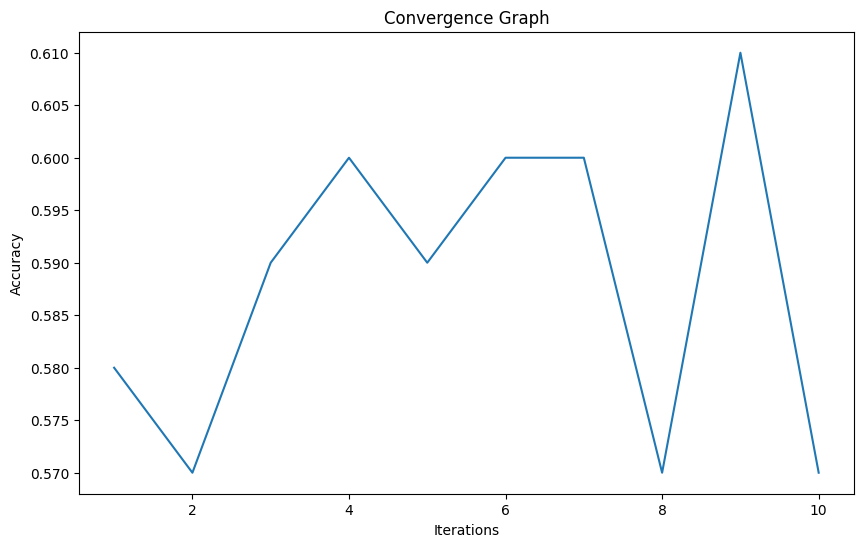

In [119]:
plt.figure(figsize=(10, 6))
plt.plot(result['Sample'], result['Best Accuracy'], label='Training Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.show()